In [312]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## Аналіз даних

1. Загрузити датасет, що містить інформацію про відвідуваність музеїв в різні роки.

In [313]:
df = pd.read_csv("museum_visitors.csv")         

2. Вивести перші 5 рядків датасету.

In [317]:
df.head()

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


3. Провести попередній аналіз даних (визначити розмір датасету, тип даних, кількість пропусків).

In [318]:
shape = df.shape
print(f'Кількість рядків: {shape[0]}')
print(f'Кількість стовпців: {shape[1]}')

Кількість рядків: 59
Кількість стовпців: 5


In [319]:
print('Типи даних:')
df.dtypes

Типи даних:


Date                                    object
Avila Adobe                              int64
Firehouse Museum                         int64
Chinese American Museum                  int64
America Tropical Interpretive Center     int64
dtype: object

In [320]:
print('Кількість пропусків:')
df.isnull().sum()

Кількість пропусків:


Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
dtype: int64

4. Перевірити наявність дублікатів. Якщо є, видалити їх і вивести розмір таблиці (без дублікатів).

In [321]:
print(f'Кількість дублікатів: {len(df[df.duplicated()])}')

Кількість дублікатів: 0


5. Про які роки містить інформацію датасет.

In [324]:
df[['year', 'month', 'day']] = df['Date'].str.split('-', expand=True).astype(int)
df.head()

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center,year,month,day
0,2014-01-01,24778,4486,1581,6602,2014,1,1
1,2014-02-01,18976,4172,1785,5029,2014,2,1
2,2014-03-01,25231,7082,3229,8129,2014,3,1
3,2014-04-01,26989,6756,2129,2824,2014,4,1
4,2014-05-01,36883,10858,3676,10694,2014,5,1


In [325]:
unique_years = df['year'].unique()

print(f'Датасет містить інформацію про такі роки: {", ".join(map(str, unique_years))}.')

Датасет містить інформацію про такі роки: 2014, 2015, 2016, 2017, 2018.


6. Змінити назви столбців. Замінити великі букви на маленьки, пробіли на підкреслення (date, avila_adobe, firehouse_museum, chinese_american_museum, america_tropical_interpretive_center).

In [326]:
df.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)
df.head()

,date,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center,year,month,day
0,2014-01-01,24778,4486,1581,6602,2014,1,1
1,2014-02-01,18976,4172,1785,5029,2014,2,1
2,2014-03-01,25231,7082,3229,8129,2014,3,1
3,2014-04-01,26989,6756,2129,2824,2014,4,1
4,2014-05-01,36883,10858,3676,10694,2014,5,1


7. Обчислити середню кількість відвідувачів для кожного музею протягом всього періоду.

In [327]:
av_v_avila_adobe      = df['avila_adobe'].mean()
av_v_firehouse        = df['firehouse_museum'].mean()
av_v_chinese_am_m     = df['chinese_american_museum'].mean()
av_v_america_tr_int_c = df['america_tropical_interpretive_center'].mean()

print('Середня кількість відвідувачів Avila Adobe:', round(av_v_avila_adobe))
print('Середня кількість відвідувачів Firehouse Museum:', round(av_v_firehouse))
print('Середня кількість відвідувачів Chinese American Museum:', round(av_v_chinese_am_m))
print('Середня кількість відвідувачів America Tropical Interpretive Center:', round(av_v_america_tr_int_c))

Середня кількість відвідувачів Avila Adobe: 24062
Середня кількість відвідувачів Firehouse Museum: 6473
Середня кількість відвідувачів Chinese American Museum: 2721
Середня кількість відвідувачів America Tropical Interpretive Center: 7107


8. Знайти мінімальну та максимальну кількість відвідувачів для кожного музею за 2018 рік

In [328]:
df_2018 = df[df['year'] == 2018]
df_2018

,date,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center,year,month,day
48,2018-01-01,16265,3910,2477,5837,2018,1,1
49,2018-02-01,14718,3306,2710,5705,2018,2,1
50,2018-03-01,19001,5225,4529,4909,2018,3,1
51,2018-04-01,18966,4535,2750,4650,2018,4,1
52,2018-05-01,25173,8013,4960,5626,2018,5,1
53,2018-06-01,22171,4635,2518,4694,2018,6,1
54,2018-07-01,23136,4191,2620,4718,2018,7,1
55,2018-08-01,20815,4866,2409,3891,2018,8,1
56,2018-09-01,21020,4956,2146,3180,2018,9,1
57,2018-10-01,19280,4622,2364,3775,2018,10,1


In [329]:
museums = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']

In [330]:
min_max_visitors_2018 = df_2018[museums].agg(['min', 'max'])

print('Мінімальна та максимальна кількість відвідувачів за 2018 рік у кожному музеї:')
min_max_visitors_2018

Мінімальна та максимальна кількість відвідувачів за 2018 рік у кожному музеї:


,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center
min,14718,3306,2146,3180
max,25173,8013,4960,5837


9. Визначити місяці з найвищою і найнижчою загальною кількістю відвідувачів серед усіх музеїв для 2015 року. Вивести назви місяців (не цифри).

In [331]:
df_2015 = df[df['year'] == 2015]
df_2015

,date,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center,year,month,day
12,2015-01-01,20438,3858,1823,6250,2015,1,1
13,2015-02-01,15578,3742,1558,5907,2015,2,1
14,2015-03-01,21297,5390,2336,9884,2015,3,1
15,2015-04-01,26670,7000,3057,7254,2015,4,1
16,2015-05-01,34383,12528,4009,13207,2015,5,1
17,2015-06-01,30569,5377,2544,11102,2015,6,1
18,2015-07-01,41242,6111,3057,11072,2015,7,1
19,2015-08-01,30700,5383,2415,12096,2015,8,1
20,2015-09-01,20967,5746,1398,6608,2015,9,1
21,2015-10-01,29764,8882,2237,12524,2015,10,1


In [332]:
total_visitors_per_month = df_2015.groupby(df_2015['month'])[museums].sum()

month_with_highest_visitors = total_visitors_per_month.sum(axis=1).idxmax()
month_with_lowest_visitors  = total_visitors_per_month.sum(axis=1).idxmin()

print('Місяць з найвищою кількістю відвідувачів у 2015 році:', calendar.month_name[month_with_highest_visitors])
print('Місяць з найнижчою кількістю відвідувачів у 2015 році:', calendar.month_name[month_with_lowest_visitors])

Місяць з найвищою кількістю відвідувачів у 2015 році: May
Місяць з найнижчою кількістю відвідувачів у 2015 році: February


10. Порівняти кількість відвідувачів музею "Avila Adobe" у літні і зимові місяці 2018 року

In [333]:
summer_months = [6, 7, 8]
winter_months = [12, 1, 2]

summer_visitors = df_2018[df_2018['month'].isin(summer_months)]['avila_adobe'].sum()
winter_visitors = df_2018[df_2018['month'].isin(winter_months)]['avila_adobe'].sum()

print('Кількість відвідувачів Avila Adobe у літні місяці 2018 року:', summer_visitors)
print('Кількість відвідувачів Avila Adobe у зимові місяці 2018 року:', winter_visitors)

Кількість відвідувачів Avila Adobe у літні місяці 2018 року: 66122
Кількість відвідувачів Avila Adobe у зимові місяці 2018 року: 30983


11. Знайти кореляцію між кількістю відвідувачів в кожному з музеїв  та датами у 2016 році

In [334]:
df_2016 = df[df['year'] == 2016]
df_2016

,date,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center,year,month,day
24,2016-01-01,19659,4377,2150,6587,2016,1,1
25,2016-02-01,17378,3675,2547,6955,2016,2,1
26,2016-03-01,20322,6334,7702,9979,2016,3,1
27,2016-04-01,24521,6509,3485,5113,2016,4,1
28,2016-05-01,31728,9315,4565,7757,2016,5,1
29,2016-06-01,23696,4918,3034,6751,2016,6,1
30,2016-07-01,31689,5602,2776,12188,2016,7,1
31,2016-08-01,25987,5181,2153,6245,2016,8,1
32,2016-09-01,22897,4736,1754,6977,2016,9,1
33,2016-10-01,25040,6145,2607,6282,2016,10,1


In [335]:
data_to_correlate = df_2016[museums]

correlation_matrix = data_to_correlate.corr()

print('Кореляція між кількістю відвідувачів в кожному з музеїв та датами у 2016 році:')
correlation_matrix

Кореляція між кількістю відвідувачів в кожному з музеїв та датами у 2016 році:


,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center
avila_adobe,1.000000,0.737200,0.089054,0.436561
firehouse_museum,0.737200,1.000000,0.553935,0.247389
chinese_american_museum,0.089054,0.553935,1.000000,0.443800
america_tropical_interpretive_center,0.436561,0.247389,0.443800,1.000000


## Візуалізація даних

12. Побудувати теплокарту кореляції для попереднього завдання.

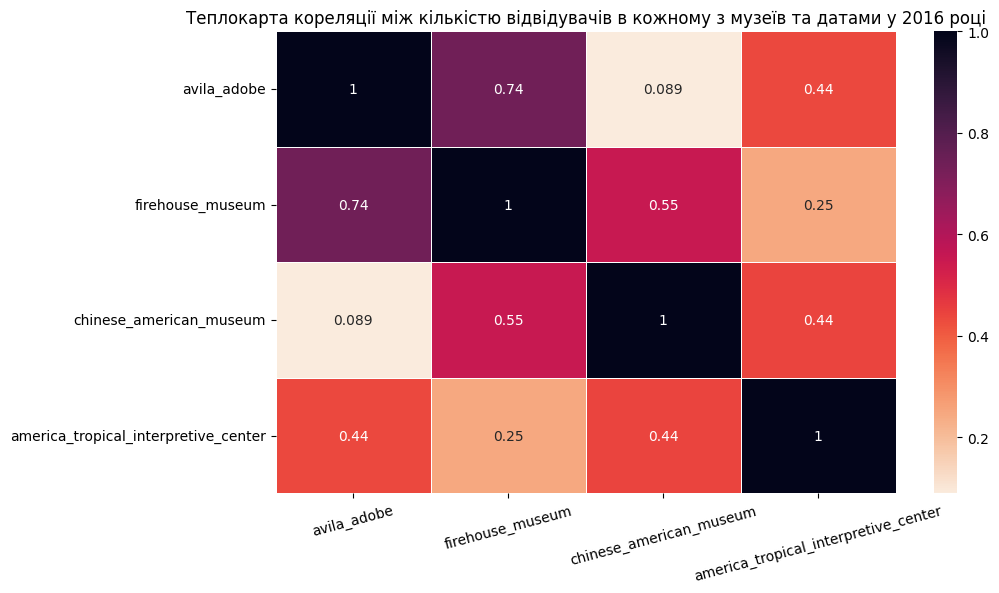

In [336]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='rocket_r', linewidths=0.5)

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=15, horizontalalignment='center')

plt.title('Теплокарта кореляції між кількістю відвідувачів в кожному з музеїв та датами у 2016 році')
plt.show()

13. Побудувати графік ліній для кожного музею, показуючи їхню відвідуваність протягом 2017 року.

In [337]:
df_2017 = df[df['year'] == 2017]
df_2017

,date,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center,year,month,day
36,2017-01-01,18792,3551,2531,4929,2017,1,1
37,2017-02-01,14035,3491,2139,4493,2017,2,1
38,2017-03-01,20680,5273,5966,6271,2017,3,1
39,2017-04-01,25234,5320,3273,6685,2017,4,1
40,2017-05-01,30029,8733,5585,7556,2017,5,1
41,2017-06-01,22169,4862,2946,6818,2017,6,1
42,2017-07-01,30831,5242,2939,8675,2017,7,1
43,2017-08-01,27009,5379,1784,6212,2017,8,1
44,2017-09-01,23403,4484,1704,4607,2017,9,1
45,2017-10-01,22164,4822,2419,6097,2017,10,1


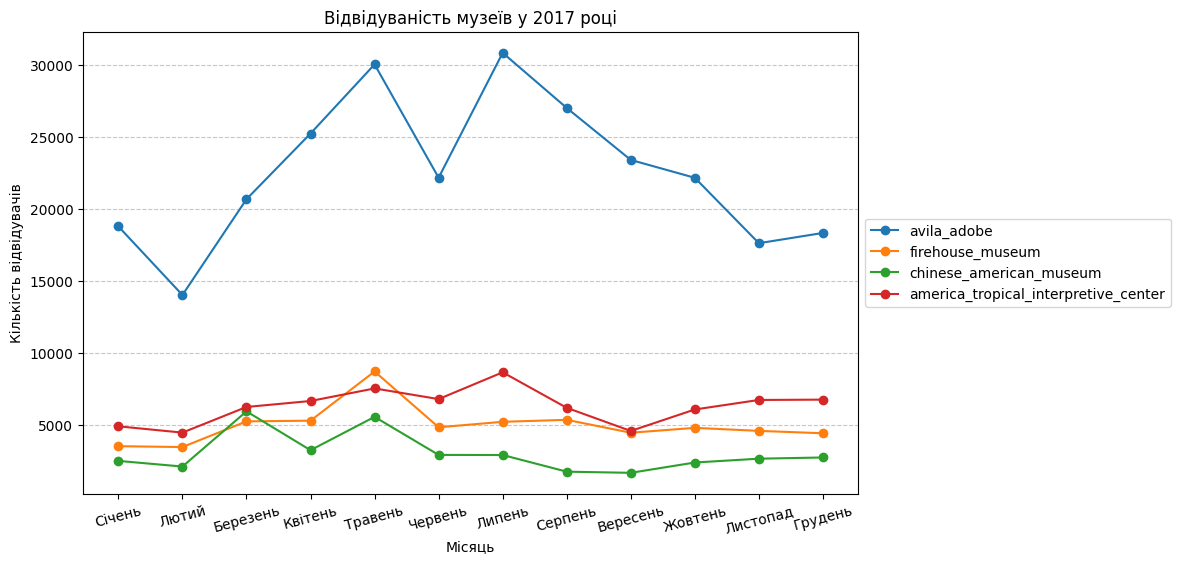

In [338]:
plt.figure(figsize=(10, 6))
for m in museums:
    plt.plot(df_2017['month'], df_2017[m], marker='o', label=m)

plt.xlabel('Місяць')
plt.ylabel('Кількість відвідувачів')
plt.title('Відвідуваність музеїв у 2017 році')
plt.xticks(range(1, 13), ['Січень', 'Лютий', 'Березень', 'Квітень', 'Травень', 'Червень', 
                          'Липень', 'Серпень', 'Вересень', 'Жовтень', 'Листопад', 'Грудень'], rotation = 15)
plt.legend(loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

14. Побудувати графіки розсіювання для кожного музею за 2018 рік

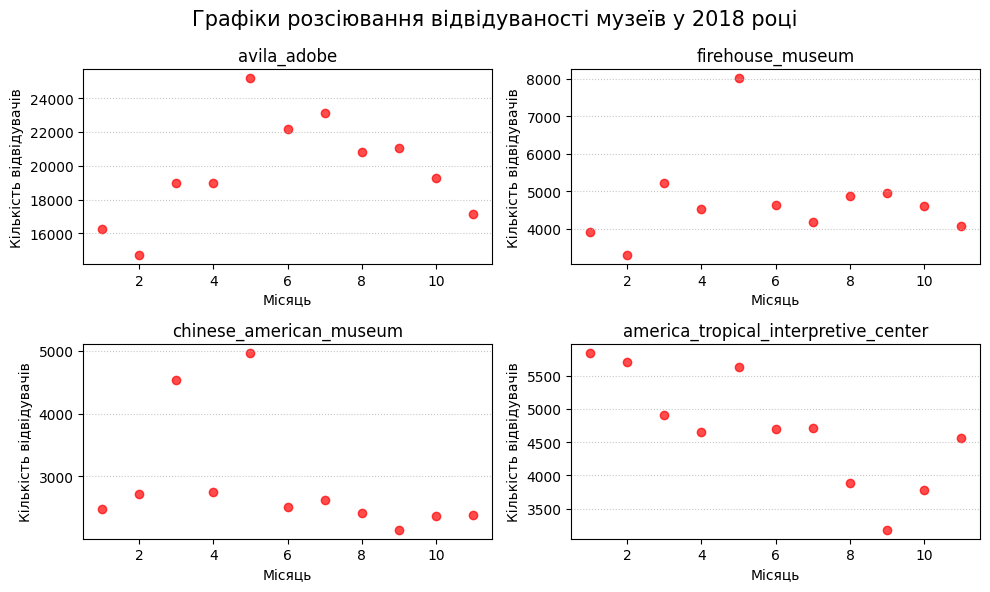

In [339]:
plt.figure(figsize=(10, 6))

for i, m in enumerate(museums, 1):
    plt.subplot(2, 2, i)
    plt.scatter(df_2018['month'], df_2018[m], color='r', alpha=0.7)
    plt.xlabel('Місяць')
    plt.ylabel('Кількість відвідувачів')
    plt.grid(axis='y', linestyle=':', alpha=0.7)
    plt.title(f'{m}')

plt.suptitle('Графіки розсіювання відвідуваності музеїв у 2018 році', fontsize=15)
plt.tight_layout()
plt.show()

15. Гістограма відвідуваності за місяцями кожного музею. Вивести 4 графіки: за 2014, 2015, 2016, 2017 роки. Графіки розташовані два зверху, два знизу, колір першого графіка - синій, другого зелений, третього жовтий, четвертого сірий.

In [340]:
df_2014 = df[df['year'] == 2014]
df_2014

,date,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center,year,month,day
0,2014-01-01,24778,4486,1581,6602,2014,1,1
1,2014-02-01,18976,4172,1785,5029,2014,2,1
2,2014-03-01,25231,7082,3229,8129,2014,3,1
3,2014-04-01,26989,6756,2129,2824,2014,4,1
4,2014-05-01,36883,10858,3676,10694,2014,5,1
5,2014-06-01,29487,5751,2121,11036,2014,6,1
6,2014-07-01,32378,5406,2239,13490,2014,7,1
7,2014-08-01,37680,8619,1769,9139,2014,8,1
8,2014-09-01,28473,61192,1073,5661,2014,9,1
9,2014-10-01,27995,6488,1979,7356,2014,10,1


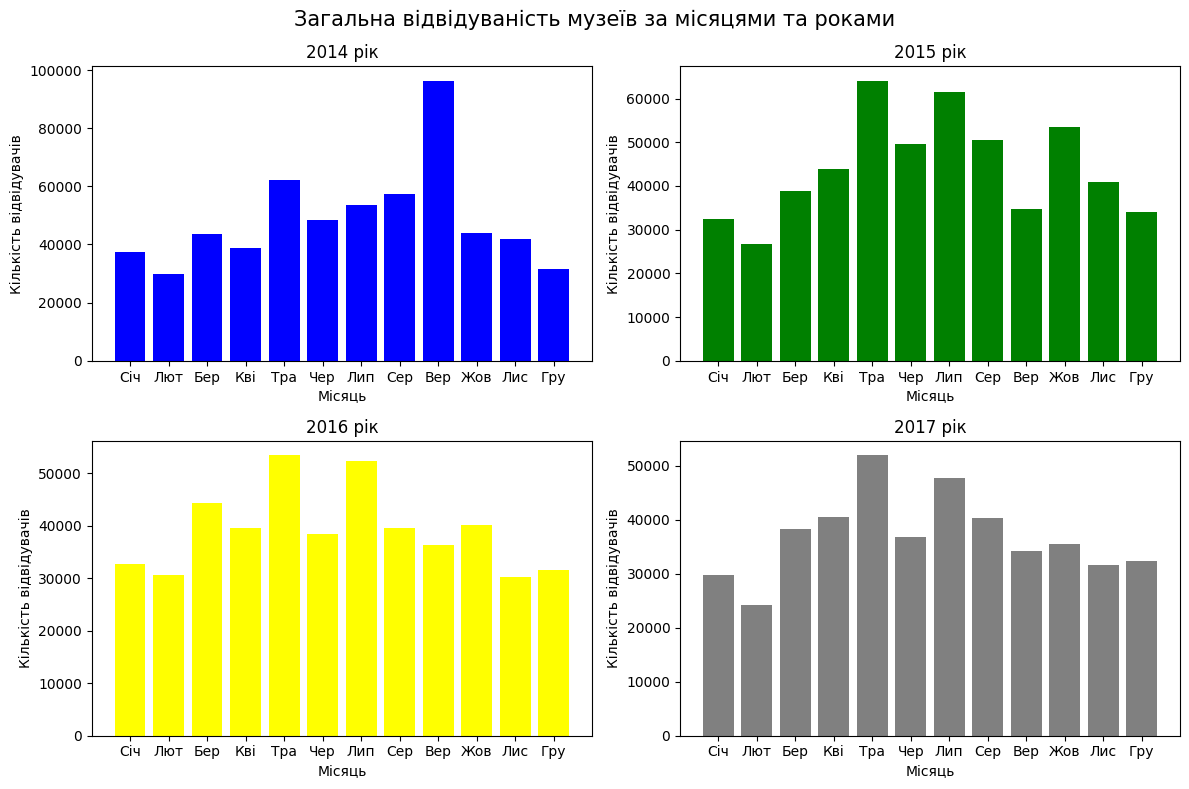

In [341]:
total_visitors_2014 = df_2014.groupby('month')[museums].sum().sum(axis=1)
total_visitors_2015 = df_2015.groupby('month')[museums].sum().sum(axis=1)
total_visitors_2016 = df_2016.groupby('month')[museums].sum().sum(axis=1)
total_visitors_2017 = df_2017.groupby('month')[museums].sum().sum(axis=1)

years    = [2014, 2015, 2016, 2017]
visitors = [total_visitors_2014, total_visitors_2015, total_visitors_2016, total_visitors_2017]
colors   = ['blue', 'green', 'yellow', 'grey']

plt.figure(figsize=(12, 8))

for i, (year, visitor_count, color) in enumerate(zip(years, visitors, colors), 1):
    plt.subplot(2, 2, i)
    plt.bar(visitor_count.index, visitor_count.values, color=color)
    plt.xlabel('Місяць')
    plt.ylabel('Кількість відвідувачів')
    plt.title(f'{year} рік')
    plt.xticks(range(1, 13), ['Січ', 'Лют', 'Бер', 'Кві', 'Тра', 'Чер', 'Лип', 'Сер', 'Вер', 'Жов', 'Лис', 'Гру'])
    
plt.suptitle('Загальна відвідуваність музеїв за місяцями та роками', fontsize=15)
plt.tight_layout()
plt.show()

## Висновки

Музей Avila Adobe був лідером за кількістю відвідувачів в усіх місяцях. Він має найбільшу кількість відвідувачів порівняно з іншими музеями, що свідчить про його популярність серед відвідувачів. У той час як Firehouse Museum та America Tropical Interpretive Center також приваблюють багато відвідувачів, їхні показники трошки менше, ніж у Avila Adobe. Chinese American Museum, хоча й має зростаючу кількість відвідувачів, але вона менша у порівнянні з іншими музеями.

На основі щомісячних даних можна виявити, що є певні місяці, коли відвідуваність зазвичай зростає. Ці місяці можуть бути пов'язані з відпустками, святами або іншими подіями, які привертають більше відвідувачів. Є сезонні варіації відвідуваності. Взимку (особливо у грудні) кількість відвідувачів зазвичай нижча порівняно з літнім періодом.

